# Naive-Bayes with CountVectorizer and No Preprocessing
____

##### Importing Libraries

In [1]:
import os
import glob
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

##### Importing Dataset

In [2]:
train_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/pos/'
train_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/train/neg/'
test_positive_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/pos/'
test_negative_path = 'C:/Users/susya/TCS iON Projects/Projects/Project 10-20/aclImdb/test/neg/'

##### Reading Data from Function

In [3]:
def read_files_in_path(path):
    positive_training_data=[]
    for filepath in glob.glob(os.path.join(path, '*.txt')):
        with open(filepath,encoding='utf8') as f:
            content = f.read()
            positive_training_data.append(content)
    return positive_training_data

##### Reading training data

In [4]:
positive_training_data = read_files_in_path(train_positive_path)
print(len(positive_training_data))

12500


In [5]:
negative_training_data = read_files_in_path(train_negative_path)
print(len(negative_training_data))

12500


In [6]:
whole_training_data = positive_training_data+negative_training_data
print(len(whole_training_data))

25000


##### Reading Test Data

In [7]:
positive_test_data = read_files_in_path(test_positive_path)
print(len(positive_test_data))

12500


In [8]:
negative_test_data = read_files_in_path(test_negative_path)
print(len(negative_test_data))

12500


In [9]:
whole_test_data = positive_test_data+negative_test_data
print(len(whole_test_data))

25000


##### Apply feature extraction: countVectorizer which is based on bag of words algorithm

In [10]:
vectorizer = CountVectorizer(ngram_range=(1,4))
train_vector = vectorizer.fit_transform(whole_training_data)
test_vector = vectorizer.transform(whole_test_data)

##### Create labels for the training data and test data first 12500 are positive and the remaining 12500 are negative

In [11]:
train_labels = np.asarray([1]*len(positive_training_data) + [0]*len(negative_training_data))
test_labels = np.asarray([1]*len(positive_test_data) + [0]*len(negative_test_data))

#### Printing some visualization of the sizes of the train and test vectors 
train_vector has 25000 row corresponding to the 25000 review and 74849 feature extracted

In [12]:
print(train_labels.shape)
print(train_vector.shape)

(25000,)
(25000, 10109522)


##### Printing shapes of test vector and label

In [13]:
print(test_labels.shape)
print(test_vector.shape)

(25000,)
(25000, 10109522)


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

clf = GridSearchCV(MultinomialNB(),{'alpha':[0.5,0.8,1.0,2.0,3.0]},cv=5,return_train_score=False)
clf.fit(train_vector, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.5, 0.8, 1.0, 2.0, 3.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
df=pd.DataFrame(clf.cv_results_)
print(df[['param_alpha','mean_test_score']])

  param_alpha  mean_test_score
0         0.5          0.84380
1         0.8          0.84808
2           1          0.84972
3           2          0.85428
4           3          0.85468


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=3)
scores = cross_val_score(clf, train_vector, train_labels, cv=5)
print(scores*100)
print("Mean Accuracy: %0.2f  (+/- %0.2f deviation) " % (scores.mean()*100, scores.std()))

[86.   85.   86.58 84.5  85.26]
Mean Accuracy: 85.47  (+/- 0.01 deviation) 


In [17]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB(alpha=3)
gnb.fit(train_vector, train_labels)
print("Naive Bayes with no preprocessing & using CountVectorizer classification accuracy:\n",gnb.score(test_vector,test_labels)*100,"%")

Naive Bayes with no preprocessing & using CountVectorizer classification accuracy:
 87.636 %


In [18]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[11139  1361]
 [ 1730 10770]]


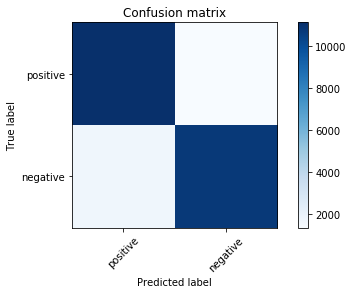

In [19]:
from sklearn.metrics import confusion_matrix
test_predicted=gnb.predict(test_vector)
cm=confusion_matrix(test_labels, test_predicted)
plot_confusion_matrix(cm, labels=["positive","negative"])
print(cm)